In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc Dữ liệu từ Tệp CSV
columns_to_keep = ['authors', 'category', 'pages', 'original_price']
df = pd.read_csv('/content/drive/MyDrive/DataMining/BTL/data/prepared_data_book.csv', usecols=columns_to_keep)

# 2. Chuẩn bị Dữ liệu
X = df[['authors', 'category', 'pages']]
y = df['original_price']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 3. Chuẩn hóa Dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Xây dựng Mô hình ANN
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Huấn luyện Mô hình
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=5,
                    verbose = 1,
                    batch_size=32,
                    validation_split=0.1)

# 6. Đánh giá Mô hình
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Dự đoán giá sách cho toàn bộ dữ liệu
X_all_scaled = scaler.transform(X_encoded)
predicted_prices = model.predict(X_all_scaled)
df['predicted_price_ann'] = predicted_prices

df[['original_price', 'predicted_price_ann']]


Epoch 1/5
37/37 [==============================] - 1s 11ms/step - loss: 30.4340 - val_loss: 15.9954
Epoch 2/5
37/37 [==============================] - 0s 5ms/step - loss: 7.9690 - val_loss: 11.0688
Epoch 3/5
37/37 [==============================] - 0s 7ms/step - loss: 4.8584 - val_loss: 9.6146
Epoch 4/5
37/37 [==============================] - 0s 13ms/step - loss: 3.1778 - val_loss: 8.4221
Epoch 5/5
11/11 [==============================] - 0s 3ms/step
Mean Squared Error: 4.4549628733926605
52/52 [==============================] - 0s 4ms/step


,original_price,predicted_price_ann
0,4.56,4.748684
1,3.63,3.662580
2,8.86,10.397882
3,3.33,3.302379
4,5.70,5.545137
...,...,...
1640,10.55,10.838614
1641,3.59,3.027648
1642,4.56,4.542812
1643,7.55,7.843197


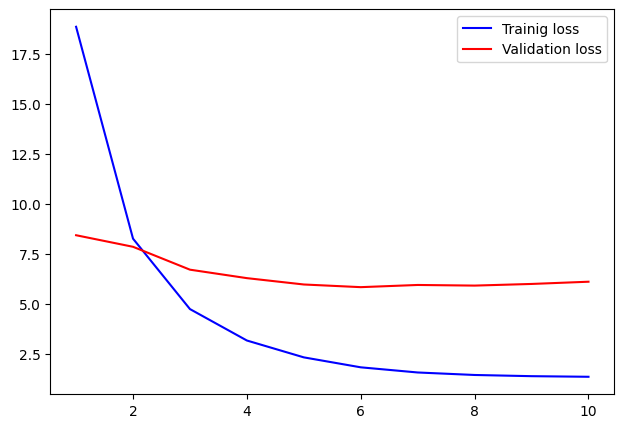

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 5))

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label = 'Trainig loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

plt.show()